In [1]:
import pandas as pd
import urllib
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

# <center>Tarea 3 Máquinas de Aprendizaje</center>

<center>
Patricio Horth M.<br>
Víctor Zúñiga M.<br>

22 de Diciembre de 2017
</center>

# 4. Imágenes de Lenguaje de Señas

## a) Ingreso y análisis descriptivo de los datos

"The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255."

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    #print("Y training original")
    #print(y_tr.describe())
    y_t = test['label']
    x_t = test.iloc[:,1:]
    #you need to add Xval: x_v,y_v
    x_tr_two, x_v, y_tr_two, y_v = train_test_split(x_tr, y_tr, test_size=0.2, random_state=2)
    print("Y training")
    print(y_tr_two.describe())
    print("\nY validation")
    print(y_v.describe())
    print("\nY testing")
    print(y_t.describe())
    
    
    return(x_tr_two,x_v,x_t,y_tr_two,y_v,y_t)


x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

Y training
count    21964.000000
mean        12.340056
std          7.296453
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

Y validation
count    5491.000000
mean       12.233837
std         7.251879
min         0.000000
25%         6.000000
50%        13.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64

Y testing
count    7172.000000
mean       11.247351
std         7.446712
min         0.000000
25%         4.000000
50%        11.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64


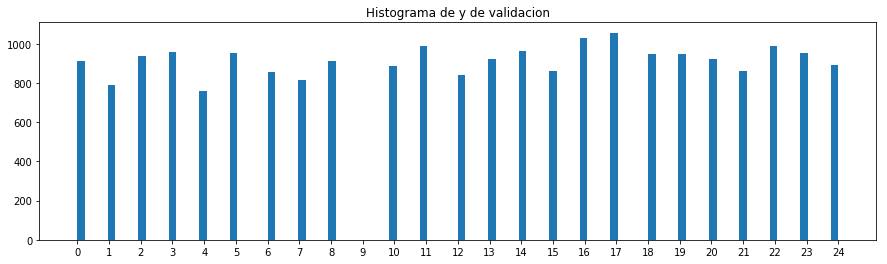

In [3]:
from matplotlib.pylab import hist, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

plt.title("Histograma de y de validacion")
plt.hist(y_tr,bins=100)
plt.xticks(range(0,25))
plt.show()

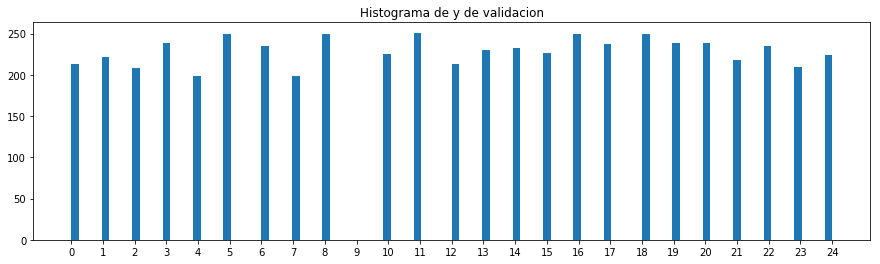

In [4]:
from matplotlib.pylab import hist, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

plt.title("Histograma de y de validacion")
plt.hist(y_v,bins=100)
plt.xticks(range(0,25))
plt.show()

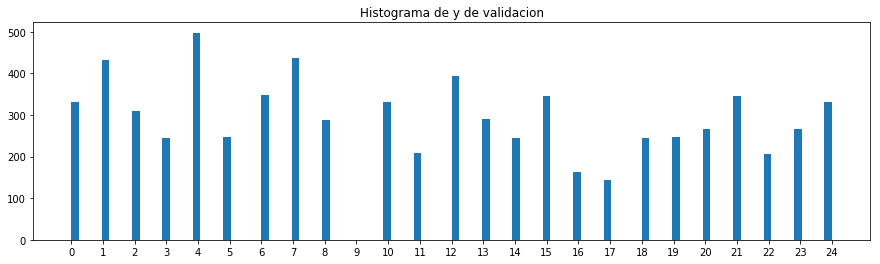

In [5]:
from matplotlib.pylab import hist, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

plt.title("Histograma de y de validacion")
plt.hist(y_t,bins=100)
plt.xticks(range(0,25))
plt.show()

In [6]:
y_tr.describe()

count    21964.000000
mean        12.340056
std          7.296453
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

In [7]:
x_tr.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,...,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000
mean,145.315425,148.399973,151.177108,153.510199,156.160080,158.338326,160.400474,162.269760,163.882398,165.455427,...,141.187944,147.628938,153.461027,159.227008,162.075487,162.888363,163.107949,162.155983,161.246085,159.896285
std,41.209421,39.802453,38.836225,38.290959,36.869741,35.931102,34.858420,33.494483,32.495129,31.144656,...,63.725485,65.431314,64.418657,63.628838,63.666644,63.284134,63.324200,63.187234,63.521965,64.340061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,145.000000,146.000000,148.000000,...,92.000000,96.000000,103.000000,112.000000,120.750000,125.000000,128.000000,128.000000,128.000000,126.000000
50%,150.000000,153.000000,155.000000,158.000000,160.000000,162.000000,163.000000,165.000000,166.000000,167.000000,...,144.000000,163.000000,173.000000,180.000000,183.000000,184.000000,184.000000,183.000000,182.000000,182.000000
75%,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,205.000000,204.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
x_tr.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15521,178,181,182,183,186,186,188,190,190,189,...,209,208,207,207,206,206,205,204,202,201
9897,148,150,152,153,154,155,154,154,155,155,...,185,186,185,184,183,181,179,175,178,140
26713,197,197,198,199,198,198,197,199,200,199,...,124,151,160,163,167,176,179,174,181,189
23652,176,177,177,179,179,178,179,177,177,178,...,0,0,0,0,0,0,16,0,0,0
13417,96,100,104,110,116,121,129,135,141,145,...,218,211,215,219,220,221,221,223,224,223


In [9]:
y_tr.head()

15521    13
9897      7
26713     7
23652    14
13417     5
Name: label, dtype: int64

## b) Preprocesamiento de los datos

A continuacion ...

Siendo que los datos son pixeles en escala de grises con valores de 1 a 255, se dividirá cada celda por 255 para que estén en un rango $[0,1]$


In [10]:
X_train = x_tr / 255
X_val = x_v / 255 
X_test = x_t / 255

In [11]:
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,...,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000
mean,0.569864,0.581961,0.592851,0.602001,0.612392,0.620935,0.629021,0.636352,0.642676,0.648845,...,0.553678,0.578937,0.601808,0.624420,0.635590,0.638778,0.639639,0.635906,0.632338,0.627044
std,0.161606,0.156088,0.152299,0.150161,0.144587,0.140906,0.136700,0.131351,0.127432,0.122136,...,0.249904,0.256593,0.252622,0.249525,0.249673,0.248173,0.248330,0.247793,0.249106,0.252314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474510,0.494118,0.509804,0.521569,0.537255,0.549020,0.556863,0.568627,0.572549,0.580392,...,0.360784,0.376471,0.403922,0.439216,0.473529,0.490196,0.501961,0.501961,0.501961,0.494118
50%,0.588235,0.600000,0.607843,0.619608,0.627451,0.635294,0.639216,0.647059,0.650980,0.654902,...,0.564706,0.639216,0.678431,0.705882,0.717647,0.721569,0.721569,0.717647,0.713725,0.713725
75%,0.682353,0.690196,0.698039,0.701961,0.709804,0.713725,0.717647,0.721569,0.725490,0.725490,...,0.768627,0.792157,0.803922,0.811765,0.815686,0.811765,0.811765,0.807843,0.803922,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15521,0.698039,0.709804,0.713725,0.717647,0.729412,0.729412,0.737255,0.745098,0.745098,0.741176,...,0.819608,0.815686,0.811765,0.811765,0.807843,0.807843,0.803922,0.800000,0.792157,0.788235
9897,0.580392,0.588235,0.596078,0.600000,0.603922,0.607843,0.603922,0.603922,0.607843,0.607843,...,0.725490,0.729412,0.725490,0.721569,0.717647,0.709804,0.701961,0.686275,0.698039,0.549020
26713,0.772549,0.772549,0.776471,0.780392,0.776471,0.776471,0.772549,0.780392,0.784314,0.780392,...,0.486275,0.592157,0.627451,0.639216,0.654902,0.690196,0.701961,0.682353,0.709804,0.741176
23652,0.690196,0.694118,0.694118,0.701961,0.701961,0.698039,0.701961,0.694118,0.694118,0.698039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062745,0.000000,0.000000,0.000000
13417,0.376471,0.392157,0.407843,0.431373,0.454902,0.474510,0.505882,0.529412,0.552941,0.568627,...,0.854902,0.827451,0.843137,0.858824,0.862745,0.866667,0.866667,0.874510,0.878431,0.874510


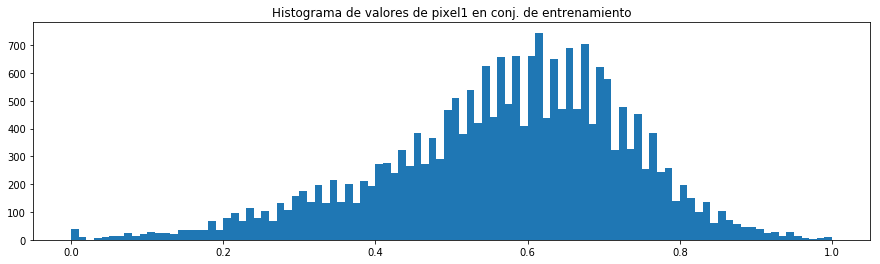

In [13]:
from matplotlib.pylab import hist, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

plt.title("Histograma de valores de pixel1 en conj. de entrenamiento")
plt.hist(X_train['pixel1'],bins=100)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

df_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
df_val_std = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
df_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [15]:
df_train_std.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,...,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04
mean,2.918354e-16,-4.420395e-16,3.531115e-17,7.673790e-17,-5.281634e-17,6.256706e-16,-3.544434e-16,5.630449e-16,-7.550391e-17,6.943140e-16,...,-6.793570e-17,-1.454148e-16,1.440803e-16,7.961215e-17,-3.121656e-16,1.447475e-16,-1.083382e-16,-1.355631e-16,-2.373049e-16,8.334255e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-3.526347e+00,-3.728498e+00,-3.892771e+00,-4.009137e+00,-4.235550e+00,-4.406821e+00,-4.601589e+00,-4.844782e+00,-5.043406e+00,-5.312603e+00,...,-2.215615e+00,-2.256294e+00,-2.382299e+00,-2.502492e+00,-2.545747e+00,-2.573980e+00,-2.575819e+00,-2.566336e+00,-2.538488e+00,-2.485231e+00
25%,-5.900587e-01,-5.627915e-01,-5.453051e-01,-5.356530e-01,-5.196813e-01,-5.103863e-01,-5.278751e-01,-5.156119e-01,-5.503227e-01,-5.604758e-01,...,-7.718900e-01,-7.890735e-01,-7.833472e-01,-7.422434e-01,-6.491064e-01,-5.987160e-01,-5.544286e-01,-5.405643e-01,-5.233913e-01,-5.268422e-01
50%,1.136799e-01,1.155741e-01,9.843848e-02,1.172575e-01,1.041506e-01,1.019105e-01,7.457554e-02,8.151499e-02,6.516822e-02,4.959464e-02,...,4.412866e-02,2.349244e-01,3.033192e-01,3.264788e-01,3.286649e-01,3.336084e-01,3.299296e-01,3.298845e-01,3.267277e-01,3.435530e-01
75%,6.960842e-01,6.934411e-01,6.906825e-01,6.657024e-01,6.737364e-01,6.585440e-01,6.483381e-01,6.487855e-01,6.498846e-01,6.275561e-01,...,8.601473e-01,8.309828e-01,8.000810e-01,7.508243e-01,7.213441e-01,6.970569e-01,6.931481e-01,6.938904e-01,6.888155e-01,6.854939e-01
max,2.661699e+00,2.678289e+00,2.673413e+00,2.650550e+00,2.680848e+00,2.690256e+00,2.713883e+00,2.768586e+00,2.804103e+00,2.875184e+00,...,1.786015e+00,1.641011e+00,1.576271e+00,1.505216e+00,1.459581e+00,1.455558e+00,1.451169e+00,1.469381e+00,1.475963e+00,1.478175e+00


In [16]:
df_train_std['pixel1'].values

array([ 0.79315161,  0.06514617,  1.25422173, ...,  0.11367986,
        0.30781465,  0.2350141 ])

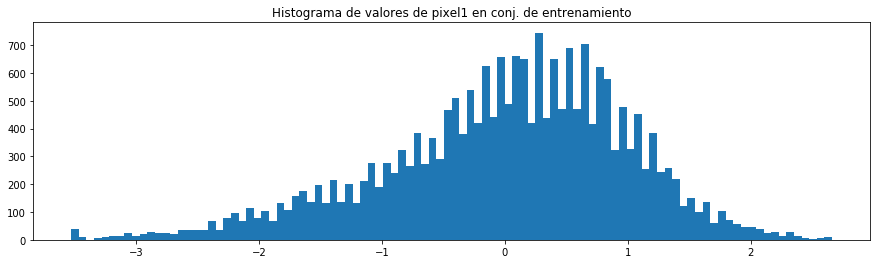

In [17]:
plt.title("Histograma de valores de pixel1 en conj. de entrenamiento")
plt.hist(df_train_std['pixel1'],bins=100)
plt.show()

In [24]:
#from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Modelo secuencial (feed forward)
model = Sequential()

model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1, validation_data=(x_v.values,to_categorical(y_v)))

Using TensorFlow backend.
C:\Users\Boti\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Boti\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Boti\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Boti\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/100
21964/21964 [==============================] - 2s 85us/step - loss: 15.4297 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 2/100
21964/21964 [==============================] - 1s 59us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 3/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 4/100
21964/21964 [==============================] - ETA: 0s - loss: 15.4877 - acc: 0.03 - 2s 85us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 5/100
21964/21964 [==============================] - 2s 73us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 6/100
21964/21964 [==============================] - 3s 114us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 7/100
21964/21964 [==============================] - 2s 104us/step

Epoch 58/100
21964/21964 [==============================] - 2s 68us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 59/100
21964/21964 [==============================] - 2s 110us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 60/100
21964/21964 [==============================] - 3s 119us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 61/100
21964/21964 [==============================] - 2s 86us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 62/100
21964/21964 [==============================] - 3s 118us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 63/100
21964/21964 [==============================] - 2s 96us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 64/100
21964/21964 [==============================] - 2s 74us/step - loss: 15.4943 - acc: 0.0387 - val_loss: 15.4136 - val_acc: 0.0437
Epoch 65/1

In [30]:
#from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Modelo secuencial (feed forward)
model = Sequential()

model.add(Dense(30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/100
21964/21964 [==============================] - 2s 91us/step - loss: 3.1924 - acc: 0.0982 - val_loss: 3.1207 - val_acc: 0.1018
Epoch 2/100
21964/21964 [==============================] - 1s 47us/step - loss: 2.8818 - acc: 0.1269 - val_loss: 2.6251 - val_acc: 0.1515
Epoch 3/100
21964/21964 [==============================] - 1s 47us/step - loss: 2.2955 - acc: 0.2632 - val_loss: 1.9061 - val_acc: 0.3661
Epoch 4/100
21964/21964 [==============================] - 2s 102us/step - loss: 1.6256 - acc: 0.4547 - val_loss: 1.4097 - val_acc: 0.5265
Epoch 5/100
21964/21964 [==============================] - 2s 102us/step - loss: 1.1973 - acc: 0.5930 - val_loss: 1.0383 - val_acc: 0.6431
Epoch 6/100
21964/21964 [==============================] - 2s 90us/step - loss: 0.8562 - acc: 0.7184 - val_loss: 0.7440 - val_acc: 0.7483loss: 0.8873 - ac
Epoch 7/100
21964/21964 [==============================] - 2s 111us/step - loss: 0.5947 - acc: 0.8117 - 

21964/21964 [==============================] - 2s 94us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 0.9998
Epoch 58/100
21964/21964 [==============================] - 3s 130us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 0.9998 acc
Epoch 59/100
21964/21964 [==============================] - 3s 117us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 0.9998
Epoch 60/100
21964/21964 [==============================] - 3s 127us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 0.9998
Epoch 61/100
21964/21964 [==============================] - 1s 67us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 0.9998
Epoch 62/100
21964/21964 [==============================] - 3s 139us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 0.9998
Epoch 63/100
21964/21964 [==============================] - 2s 90us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 0.9998
Epoch 64/100
21964/21964 [======

In [26]:
loss_and_metrics = model.evaluate(x_t.values, y_t.values, batch_size=128)

ValueError: Error when checking target: expected dense_3 to have shape (None, 25) but got array with shape (7172, 1)

## d) Matriz de Confusión

## e) Clasificación mediante SVM no lineal

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVR

model = SVC(verbose=15, C=0.01)
model.fit(df_train_std, y_tr)
Y_pred_train = model.predict(df_train_std)
Y_pred_val = model.predict(df_val_std)
Y_pred_test = model.predict(df_test_std)

[LibSVM]

In [ ]:
print(model.score(df_val_std, y_val))

## f) Clasificación mediante Árbol de Clasificación

In [37]:
from sklearn.tree import DecisionTreeClassifier as Tree

model_tree_default = Tree(random_state=0) # Arbol por defecto
model_tree_default.fit(df_train_std, y_tr)
Y_pred_train = model_tree_default.predict(df_train_std)
Y_pred_val = model_tree_default.predict(df_val_std)
Y_pred_test = model_tree_default.predict(df_test_std)

print("Score Train: ", model_tree_default.score(df_train_std, y_tr))
print("Score Val: ", model_tree_default.score(df_val_std, y_v))
print("Score Test: ", model_tree_default.score(df_test_std, y_t))

Score Train:  1.0
Score Val:  0.875978874522
Score Test:  0.458170663692


In [38]:
model_tree_default

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[10, 20, 50, 200, None], 'min_samples_split': [5,10,15,20,50,100], 'min_samples_leaf': [5,10,15,20,50,100] }
clf = GridSearchCV(Tree(random_state=0), parameters, verbose=10, n_jobs=4, cv=2)
clf.fit(df_val_std, y_v)
tree_model_cv = clf.best_estimator_
print ("Mejores params:", clf.best_params_)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   20.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   23.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   32.5s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   37.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   42.5s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:   46.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   52.2s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:   59.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Do

Mejores params: {'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [26]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[20, 35, 50, 60], 'min_samples_split': [2,3,4,5,6,7,8], 'min_samples_leaf': [2,3,4,5,6,7,8] }
clf = GridSearchCV(Tree(random_state=0), parameters, verbose=10, n_jobs=4, cv=2)
clf.fit(df_val_std, y_v)
tree_model_cv = clf.best_estimator_
print ("Mejores params:", clf.best_params_)

Fitting 2 folds for each of 196 candidates, totalling 392 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   15.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.2s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   28.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   32.6s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   38.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   43.5s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   50.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   57.9s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Do

Mejores params: {'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [47]:
# Modelo GSCV1
# Datos sin preprocesamiento
model = Tree(random_state=0, max_depth=50, min_samples_leaf=5, min_samples_split=5)
model.fit(x_tr, y_tr)
Y_pred_train = model.predict(x_tr)
Y_pred_val = model.predict(x_v)
Y_pred_test = model.predict(x_t)

print("Score Train: ", model.score(x_tr, y_tr))
print("Score Val: ", model.score(x_v, y_v))
print("Score Test: ", model.score(x_t, y_t))

Score Train:  0.931342196321
Score Val:  0.83081405937
Score Test:  0.442136084774


In [36]:
# Modelo GSCV1
# Datos con preprocesamiento
model = Tree(random_state=0, max_depth=50, min_samples_leaf=5, min_samples_split=5)
model.fit(df_train_std, y_tr)
Y_pred_train = model.predict(df_train_std)
Y_pred_val = model.predict(df_val_std)
Y_pred_test = model.predict(df_test_std)

print("Score Train: ", model.score(df_train_std, y_tr))
print("Score Val: ", model.score(df_val_std, y_v))
print("Score Test: ", model.score(df_test_std, y_t))

Score Train:  0.931342196321
Score Val:  0.83044982699
Score Test:  0.442554378137


In [43]:
# Modelo GSCV2
# Datos sin preprocesamiento
model = Tree(random_state=0, max_depth=35, min_samples_leaf=2, min_samples_split=6)
model.fit(x_tr, y_tr)
Y_pred_train = model.predict(x_tr)
Y_pred_val = model.predict(x_v)
Y_pred_test = model.predict(x_t)

print("Score Train: ", model.score(x_tr, y_tr))
print("Score Val: ", model.score(x_v, y_v))
print("Score Test: ", model.score(x_t, y_t))

Score Train:  0.966991440539
Score Val:  0.853760699326
Score Test:  0.439068600112


In [33]:
# Modelo GSCV2
# Datos con preprocesamiento
model = Tree(random_state=0, max_depth=35, min_samples_leaf=2, min_samples_split=6)
model.fit(df_train_std, y_tr)
Y_pred_train = model.predict(df_train_std)
Y_pred_val = model.predict(df_val_std)
Y_pred_test = model.predict(df_test_std)

print("Score Train: ", model.score(df_train_std, y_tr))
print("Score Val: ", model.score(df_val_std, y_v))
print("Score Test: ", model.score(df_test_std, y_t))

Score Train:  0.966991440539
Score Val:  0.852850118376
Score Test:  0.439486893475


In [42]:
# Modelo GSCV3
# Datos sin preprocesamiento
model = Tree(random_state=0, max_depth=20, min_samples_leaf=5, min_samples_split=5)
model.fit(x_tr, y_tr)
Y_pred_train = model.predict(x_tr)
Y_pred_val = model.predict(x_v)
Y_pred_test = model.predict(x_t)

print("Score Train: ", model.score(x_tr, y_tr))
print("Score Val: ", model.score(x_v, y_v))
print("Score Test: ", model.score(x_t, y_t))

Score Train:  0.917273720634
Score Val:  0.820797668913
Score Test:  0.436001115449


In [39]:
# Modelo GSCV3
# Datos con preprocesamiento
model = Tree(random_state=0, max_depth=20, min_samples_leaf=5, min_samples_split=5)
model.fit(df_train_std, y_tr)
Y_pred_train = model.predict(df_train_std)
Y_pred_val = model.predict(df_val_std)
Y_pred_test = model.predict(df_test_std)

print("Score Train: ", model.score(df_train_std, y_tr))
print("Score Val: ", model.score(df_val_std, y_v))
print("Score Test: ", model.score(df_test_std, y_t))

Score Train:  0.917273720634
Score Val:  0.820069204152
Score Test:  0.436279977691
